In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df0=pd.read_csv('/content/credit.csv')
df1=df0.copy()

In [112]:
df1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Feature

In [113]:
print(df1.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [114]:
#Drop irrelevent columns
df1.drop(['ID','Customer_ID','Occupation','SSN','Type_of_Loan','Name'],axis=1,inplace=True)

# Encoding

In [115]:
df1.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Credit_Mix             100000 non-null  object
 1   Payment_of_Min_Amount  100000 non-null  object
 2   Payment_Behaviour      100000 non-null  object
 3   Credit_Score           100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [116]:
df1['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [117]:
df1['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [118]:
df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Credit_Mix'
le = LabelEncoder()
df1['Credit_Mix'] = le.fit_transform(df1['Credit_Mix'])

# Label Encoding for 'Payment_of_Min_Amount'
df1['Payment_of_Min_Amount'] = le.fit_transform(df1['Payment_of_Min_Amount'])

# Label Encoding for 'Payment_Behaviour'
df1['Payment_Behaviour'] = le.fit_transform(df1['Payment_Behaviour'])
#df1['Credit_Score'] = le.fit_transform(df1['Credit_Score'])


Target column mapping

In [120]:
# Define the mapping
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Apply the mapping to the target column
df1['Credit_Score'] = df1['Credit_Score'].map(credit_score_mapping)

# Display the updated Dataset
df1.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,2
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,2
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,2
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,2
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,2


# Remove Highly Correlated Variables

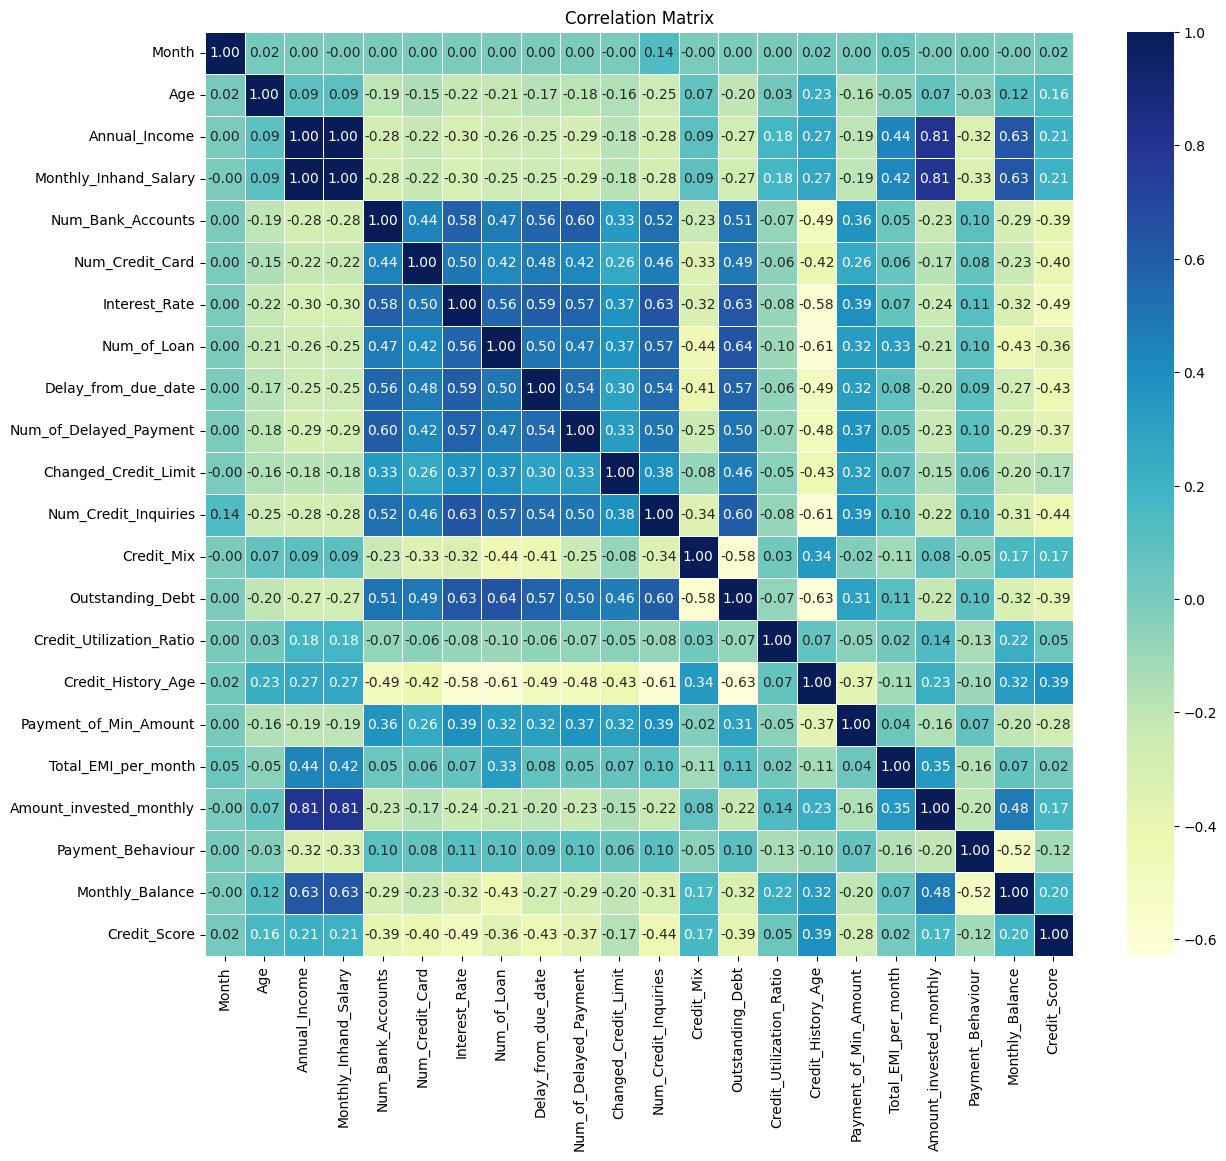

In [121]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [122]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = correlation_matrix[(correlation_matrix > correlation_threshold) & (correlation_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


# create new feature

In [123]:
#create new feature [Savings_Ratio = Amount_invested_monthly / Monthly_Inhand_Salary]
df1['Saving_ratio'] = df1['Amount_invested_monthly'] / df1['Monthly_Inhand_Salary']

**Drop Columns Monthly_Inhand_Salary and Amount_invested_monthly**

In [124]:
#drop Columns Monthly_Inhand_Salary and Amount_invested_monthly as its highly correlated with Annual_Income and created a new feature [Savings_Ratio = Amount_invested_monthly / Monthly_Inhand_Salary]
df1.drop(['Monthly_Inhand_Salary','Amount_invested_monthly'],axis=1,inplace=True)

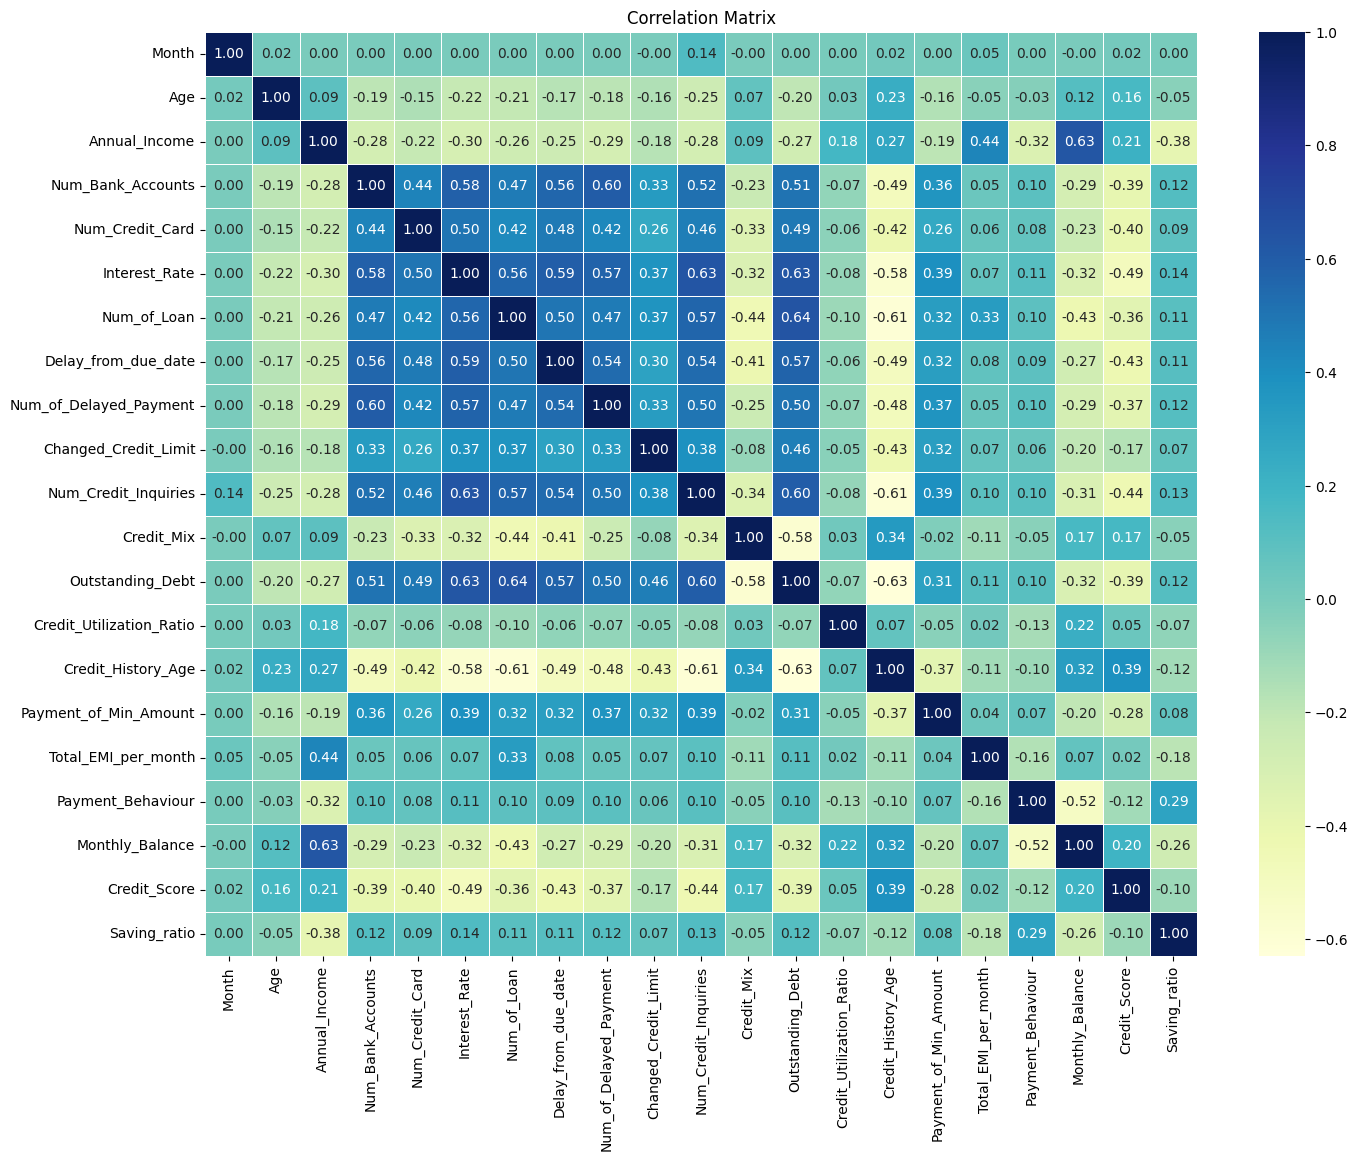

In [125]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Train Test split

In [126]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Separate the features and the target variable
X = df1.drop(columns = ['Credit_Score'])
y = df1['Credit_Score']


# Step 1: Split the data into 70% training and 30% temporary sets
X_train1, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split the temporary set into 50% validation and 50% test sets
X_val1, X_test1, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train1)

# Use the same transformation on the test data
X_test = scaler.transform(X_test1)

# Use the same transformation on the Validation data
X_val= scaler.transform(X_val1)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 70000
Validation set size: 15000
Test set size: 15000


# Model Selection

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score


# Initialize the model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = random_forest.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print('Random Forest:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_rf = accuracy_score(y_val, y_val_pred)
print("Random Forest Validation Accuracy without hyperparameter tuning:", val_accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_val_pred))

Random Forest:
  Precision: 0.8226
  Recall: 0.8222
  F1 Score: 0.8223
Random Forest Validation Accuracy without hyperparameter tuning: 0.8222
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      4349
           1       0.84      0.83      0.83      7976
           2       0.79      0.79      0.79      2675

    accuracy                           0.82     15000
   macro avg       0.81      0.82      0.81     15000
weighted avg       0.82      0.82      0.82     15000



**Cross_Validation Random Forest**

In [128]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_rf = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean()}")

Cross-Validation Scores: [0.81228571 0.8135     0.81071429 0.81642857 0.81      ]
Mean CV Score: 0.8125857142857142


***Performance Validation -Testing dataset-Random Forest*** **bold text**

In [129]:
# Now predict using the modified test set
y_test_pred = random_forest.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("RF PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("RF testing Accuracy",test_accuracy_rf)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


RF PERFORMANCE VALIDATION:
Precision:  0.8286642443021752
Recall:  0.8281333333333334
F1 Score:  0.8281670581366981
RF testing Accuracy 0.8281333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      4350
           1       0.85      0.83      0.84      7976
           2       0.79      0.79      0.79      2674

    accuracy                           0.83     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.83      0.83      0.83     15000



GradientBoosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on validation set
y_val_pred_gb = gb.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_gb, average='weighted')
recall = recall_score(y_val, y_val_pred_gb, average='weighted')
f1 = f1_score(y_val, y_val_pred_gb, average='weighted')

print('Gradient Boosting Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
print("Gradient Boosting Validation Accuracy without Hyperparameter tuning:", val_accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_val_pred_gb))

Gradient Boosting Classifier:
  Precision: 0.7212
  Recall: 0.7145
  F1 Score: 0.7154
Gradient Boosting Validation Accuracy without Hyperparameter tuning: 0.7144666666666667
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4349
           1       0.75      0.76      0.75      7976
           2       0.58      0.71      0.64      2675

    accuracy                           0.71     15000
   macro avg       0.69      0.70      0.69     15000
weighted avg       0.72      0.71      0.72     15000



Cross_Validation GradientBoosting

In [131]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_gb}")
print(f"Mean CV Score: {cv_scores_gb.mean()}")

Cross-Validation Scores: [0.71771429 0.7145     0.71342857 0.71671429 0.71378571]
Mean CV Score: 0.7152285714285714


Performance Validation -Testing dataset-GradientBoosting

In [132]:
# Now predict using the modified test set
y_test_pred = gb.predict(X_test)

test_accuracy_gb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("GB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("GB testing Accuracy",test_accuracy_gb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))

GB PERFORMANCE VALIDATION:
Precision:  0.7305070212549245
Recall:  0.7244666666666667
F1 Score:  0.7253321235122318
GB testing Accuracy 0.7244666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.70      4350
           1       0.76      0.76      0.76      7976
           2       0.60      0.72      0.65      2674

    accuracy                           0.72     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.73      0.72      0.73     15000



**Decision Tree**

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score


# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on validation set
y_val_pred_dt = dt.predict(X_val)


# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_dt, average='weighted')
recall = recall_score(y_val, y_val_pred_dt, average='weighted')
f1 = f1_score(y_val, y_val_pred_dt, average='weighted')

print('Decision Tree Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')

# Evaluate the model
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print("Decision Tree Validation Accuracy without Hyperparameter tuning:", val_accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_val_pred_dt))


Decision Tree Classifier:
  Precision: 0.7312
  Recall: 0.7316
  F1 Score: 0.7314
Decision Tree Validation Accuracy without Hyperparameter tuning: 0.7316
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      4349
           1       0.76      0.77      0.76      7976
           2       0.68      0.67      0.67      2675

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.72     15000
weighted avg       0.73      0.73      0.73     15000



**Cross_Validation Decision Tree**

In [134]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean()}")

Cross-Validation Scores: [0.72364286 0.72107143 0.71735714 0.72864286 0.708     ]
Mean CV Score: 0.7197428571428572


**Performance Validation -Testing dataset-Decision Tree**

In [135]:
# Now predict using the modified test set
y_test_pred = dt.predict(X_test)

test_accuracy_dt = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("DT PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("DT testing Accuracy",test_accuracy_dt)
print('Classification Report: \n',classification_report(y_test, y_test_pred))

DT PERFORMANCE VALIDATION:
Precision:  0.7321121247494461
Recall:  0.7326
F1 Score:  0.7322978919952052
DT testing Accuracy 0.7326
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      4350
           1       0.76      0.77      0.76      7976
           2       0.68      0.67      0.68      2674

    accuracy                           0.73     15000
   macro avg       0.72      0.71      0.72     15000
weighted avg       0.73      0.73      0.73     15000



**Naive Bayes**

In [136]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on validation set
y_val_pred_nb = nb.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_nb, average='weighted')
recall = recall_score(y_val, y_val_pred_nb, average='weighted')
f1 = f1_score(y_val, y_val_pred_nb, average='weighted')

print('Naive Bayes Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
print("Naive Bayes Validation Accuracy without Hyperparameter tuning:", val_accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_val_pred_nb))

Naive Bayes Classifier:
  Precision: 0.6949
  Recall: 0.6403
  F1 Score: 0.6452
Naive Bayes Validation Accuracy without Hyperparameter tuning: 0.6402666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      4349
           1       0.81      0.56      0.66      7976
           2       0.46      0.84      0.59      2675

    accuracy                           0.64     15000
   macro avg       0.63      0.69      0.63     15000
weighted avg       0.69      0.64      0.65     15000



Cross_Validation Naive Bayes

In [137]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_nb = cross_val_score(nb, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_nb}")
print(f"Mean CV Score: {cv_scores_nb.mean()}")

Cross-Validation Scores: [0.63816748 0.6380234  0.64205203]
Mean CV Score: 0.6394143035260371


**Performance Validation -Testing dataset-Naive Bayes**

In [138]:
# Now predict using the modified test set
y_test_pred = nb.predict(X_test)

test_accuracy_nb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("NB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("NB testing Accuracy",test_accuracy_nb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


NB PERFORMANCE VALIDATION:
Precision:  0.6951083588000132
Recall:  0.6396666666666667
F1 Score:  0.6443793126382641
NB testing Accuracy 0.6396666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      4350
           1       0.81      0.55      0.65      7976
           2       0.46      0.83      0.59      2674

    accuracy                           0.64     15000
   macro avg       0.63      0.69      0.63     15000
weighted avg       0.70      0.64      0.64     15000



**XGBoost**

In [139]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_val_pred_xgb, average='weighted')
recall = recall_score(y_val, y_val_pred_xgb, average='weighted')
f1 = f1_score(y_val, y_val_pred_xgb, average='weighted')

print('XGBoost Classifier:')
print(f'  Precision: {precision:.4f}')
print(f'  Recall: {recall:.4f}')
print(f'  F1 Score: {f1:.4f}')


# Evaluate the model
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("XGBoost Validation Accuracy without Hyperparameter tuning:", val_accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))


XGBoost Classifier:
  Precision: 0.7795
  Recall: 0.7789
  F1 Score: 0.7791
XGBoost Validation Accuracy without Hyperparameter tuning: 0.7789333333333334
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4349
           1       0.80      0.80      0.80      7976
           2       0.71      0.74      0.73      2675

    accuracy                           0.78     15000
   macro avg       0.76      0.77      0.77     15000
weighted avg       0.78      0.78      0.78     15000



Cross_Validation XGB

In [140]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data only
cv_scores_xg = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores_xg}")
print(f"Mean CV Score: {cv_scores_xg.mean()}")

Cross-Validation Scores: [0.76484958 0.76389663 0.7678824 ]
Mean CV Score: 0.7655428670470189


**Performance Validation -Testing dataset-XGB **

In [141]:
# Now predict using the modified test set
y_test_pred = xgb_model.predict(X_test)

test_accuracy_xgb = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("XGB PERFORMANCE VALIDATION:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


print("XGB testing Accuracy",test_accuracy_xgb)
print('Classification Report: \n',classification_report(y_test, y_test_pred))


XGB PERFORMANCE VALIDATION:
Precision:  0.7847803390208117
Recall:  0.7840666666666667
F1 Score:  0.7843327704526399
XGB testing Accuracy 0.7840666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      4350
           1       0.81      0.80      0.81      7976
           2       0.72      0.75      0.73      2674

    accuracy                           0.78     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.78      0.78      0.78     15000



In [142]:
# Create a dictionary with model names as keys and accuracies as values
accuracy_dict = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes', 'XGBoost'],
    'Validation Accuracy': [val_accuracy_rf, val_accuracy_gb, val_accuracy_dt, val_accuracy_nb, val_accuracy_xgb],
    'Test Accuracy': [test_accuracy_rf,test_accuracy_gb,test_accuracy_dt,test_accuracy_nb,test_accuracy_xgb],
    'Cross-Validation Accuracy': [cv_scores_rf.mean(),cv_scores_gb.mean(),cv_scores_dt.mean(),cv_scores_nb.mean(),cv_scores_xg.mean()]

}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_dict)

# Sort the DataFrame by 'Validation Accuracy' in descending order
accuracy_sorted = accuracy_df.sort_values(by='Validation Accuracy', ascending=False)
accuracy_sorted

,Model,Validation Accuracy,Test Accuracy,Cross-Validation Accuracy
0,Random Forest,0.822200,0.828133,0.812586
4,XGBoost,0.778933,0.784067,0.765543
2,Decision Tree,0.731600,0.732600,0.719743
1,Gradient Boosting,0.714467,0.724467,0.715229
3,Naive Bayes,0.640267,0.639667,0.639414


In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

In [144]:
# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [145]:
# Evaluate each classifier
for name, clf in classifiers.items():
    # Cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")

    # Print classification report
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

Logistic Regression - Cross-Validation Accuracy: 0.6478 (+/- 0.0008)
Logistic Regression - Test Accuracy: 0.6484
              precision    recall  f1-score   support

           0       0.66      0.53      0.59      4350
           1       0.66      0.75      0.70      7976
           2       0.57      0.54      0.56      2674

    accuracy                           0.65     15000
   macro avg       0.63      0.61      0.62     15000
weighted avg       0.65      0.65      0.64     15000



Decision Tree - Cross-Validation Accuracy: 0.7181 (+/- 0.0079)
Decision Tree - Test Accuracy: 0.7327
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      4350
           1       0.76      0.77      0.76      7976
           2       0.68      0.68      0.68      2674

    accuracy                           0.73     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.73      0.73      0.73     15000



Random Forest - Cros

**Random Forest Giving better Result**